<h1>Lesson 4. Model selection: Car mileage</h1>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/77/%22real_time_display%22_of_mileage_%28%22mpg%22%29_on_Honda_Insight.png/320px-%22real_time_display%22_of_mileage_%28%22mpg%22%29_on_Honda_Insight.png" style="height:200px;">
  
<p>In this exercise you will predict car mileage based on its properties. The data is taken from <a href="http://www-bcf.usc.edu/~gareth/ISL/">ISLR website</a>, but requires few transformations to make it usable for model building. These transformations will include: missing value imputation and normalizing the variables. </p>

<p>This dataset contains 397 car entries with following features:</p>
<ul>
<li>mpg miles per gallon (what we are trying to predict)</li>
<li>cylinders Number of cylinders between 4 and 8</li>
<li>displacement Engine displacement (cu. inches)</li>
<li>horsepower Engine horsepower</li>
<li>weight Vehicle weight (lbs.)</li>
<li>acceleration Time to accelerate from 0 to 60 mph (sec.)</li>
<li>year Model year (modulo 100)</li>
<li>origin Origin of car (1. American, 2. European, 3. Japanese)</li>
<li>name Vehicle name</ul>
</ul>


In [1]:
import pandas as pd

# Load the data
auto = pd.read_csv('Auto.csv')
print(auto.info())
auto.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 8 columns):
mpg             397 non-null float64
cylinders       397 non-null int64
displacement    397 non-null float64
horsepower      392 non-null float64
weight          397 non-null int64
acceleration    397 non-null float64
year            397 non-null int64
origin          397 non-null int64
dtypes: float64(4), int64(4)
memory usage: 24.9 KB
None


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


<h3>Q.1. Write a command that will calculate the number of missing values in this dataset</h3>

In [2]:
# Command(s)
auto.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      5
weight          0
acceleration    0
year            0
origin          0
dtype: int64

In [3]:
auto[auto['horsepower'].isnull()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
32,25.0,4,98.0,NaN,2046,19.0,71,1
126,21.0,6,200.0,NaN,2875,17.0,74,1
330,40.9,4,85.0,NaN,1835,17.3,80,2
336,23.6,4,140.0,NaN,2905,14.3,80,1
354,34.5,4,100.0,NaN,2320,15.8,81,2


<h3>Q.2. Write a command that will only show the rows with missing values. Can you comment on why the values might be missing (e.g. excessive prevalence of specific feature)?</h3>

In [4]:
# Command:
for k in auto.keys():
    if(auto[k].isna().sum() > 0):
        #auto_k_bad =auto[k][auto[k].isnull()]
        # print(auto[k][auto[k].isnull()])
        print(auto[auto[k].isnull()])

# Comment (One - two sentence)
# Missing totally at Random?


      mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
32   25.0          4          98.0         NaN    2046          19.0    71   
126  21.0          6         200.0         NaN    2875          17.0    74   
330  40.9          4          85.0         NaN    1835          17.3    80   
336  23.6          4         140.0         NaN    2905          14.3    80   
354  34.5          4         100.0         NaN    2320          15.8    81   

     origin  
32        1  
126       1  
330       2  
336       1  
354       2  


<h3>Q.3. Impute the missing values using median for the column. Given answer to Q.2, is this a good approach to fix the missing value problem?</h3>

In [5]:
# Command(s):
for k in auto.keys():
    if(auto[k].isna().sum() > 0):
        #auto_k_bad =auto[k][auto[k].isnull()]
        print(auto[k][auto[k].isnull()])
        print(auto[auto[k].isnull()])
        print(auto[k].mean())
        auto[k][auto[k].isnull()]=auto[k].mean()
# Comment (one sentence):
# 

32    NaN
126   NaN
330   NaN
336   NaN
354   NaN
Name: horsepower, dtype: float64
      mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
32   25.0          4          98.0         NaN    2046          19.0    71   
126  21.0          6         200.0         NaN    2875          17.0    74   
330  40.9          4          85.0         NaN    1835          17.3    80   
336  23.6          4         140.0         NaN    2905          14.3    80   
354  34.5          4         100.0         NaN    2320          15.8    81   

     origin  
32        1  
126       1  
330       2  
336       1  
354       2  
104.46938775510205


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


<h3>Q.4. Develop a Linear Regression model that predicts mpg using all the available features in the data.frame. Summarize it and comment on its quality. </h3>

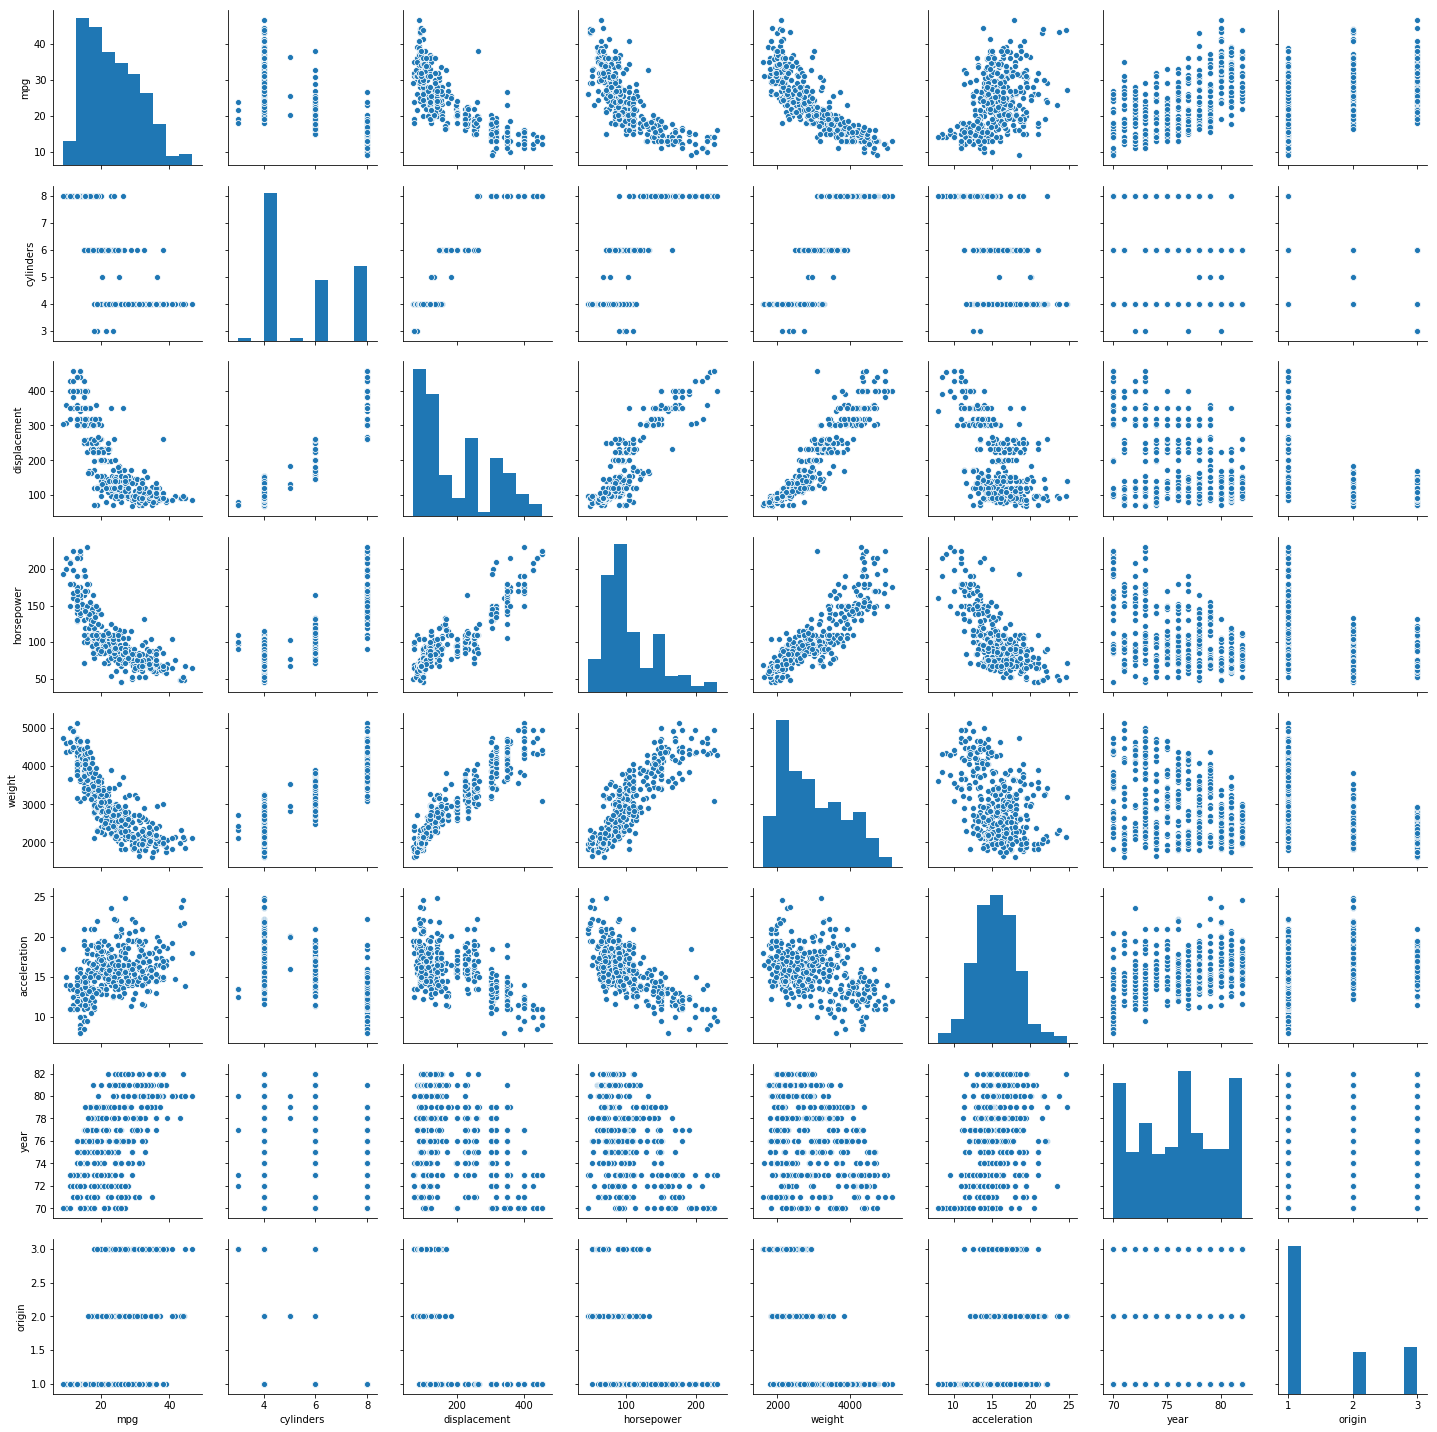

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.pairplot(auto)
plt.show()

In [17]:
X = auto.iloc[:,1:]
y = auto.iloc[:,0]


0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
5      15.0
6      14.0
7      14.0
8      14.0
9      15.0
10     15.0
11     14.0
12     15.0
13     14.0
14     24.0
15     22.0
16     18.0
17     21.0
18     27.0
19     26.0
20     25.0
21     24.0
22     25.0
23     26.0
24     21.0
25     10.0
26     10.0
27     11.0
28      9.0
29     27.0
       ... 
367    28.0
368    27.0
369    34.0
370    31.0
371    29.0
372    27.0
373    24.0
374    36.0
375    37.0
376    31.0
377    38.0
378    36.0
379    36.0
380    36.0
381    34.0
382    38.0
383    32.0
384    38.0
385    25.0
386    38.0
387    26.0
388    22.0
389    32.0
390    36.0
391    27.0
392    27.0
393    44.0
394    32.0
395    28.0
396    31.0
Name: mpg, Length: 397, dtype: float64


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [24]:
# Develop the model 
from sklearn import linear_model
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions = lm.predict(X_test)

predictions[0:5], y_test[0:5]
# Comment on its quality 
# 

(array([25.67972935, 31.22903423, 29.70800647, 25.91766391, 13.42612499]),
 114    26.0
 278    31.5
 237    30.5
 57     24.0
 72     15.0
 Name: mpg, dtype: float64)

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
# print('Accuracy of LR',mean_squared_error(predictions,y_test))
print(mean_absolute_error(y_test, predictions))
print(mean_squared_error(y_test, predictions))
print(np.sqrt(mean_squared_error(y_test, predictions)))


2.6767581621239147
11.902069283199182
3.4499375767105094


<h3>Q.5. Show histogram of engine displacement to reveal its non-normal distribution.</h3>

In [ ]:
# Histogram of engine displacement
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.hist(auto['displacement'], bins=20)
plt.show()


<h3>Q.6. Normalize this feature by either applying Box-Cox transformation or any normalization tool from Scikit-learn. Plot this new feature to see whether it is now normally distributed.</h3>

In [37]:
# Plot histogram of this new feature to reveal normal-like distribution
from sklearn import preprocessing
disp = auto['displacement']

min_max_scaler = preprocessing.MinMaxScaler()
disp_scaled = min_max_scaler.fit_transform(disp.values.reshape(-1, 1))
print(disp_scaled)

auto['displacement'] = disp_scaled
# pt = preprocessing.PowerTransformer(method='box-cox', standardize=False)
# pt.fit_transform(disp)
# print(disp.head()), print(disp_normal.head())

[[0.61757106]
 [0.72868217]
 [0.64599483]
 [0.60981912]
 [0.60465116]
 [0.93281654]
 [0.99741602]
 [0.96124031]
 [1.        ]
 [0.83204134]
 [0.81395349]
 [0.70284238]
 [0.85788114]
 [1.        ]
 [0.11627907]
 [0.33591731]
 [0.33850129]
 [0.34108527]
 [0.0749354 ]
 [0.0749354 ]
 [0.10852713]
 [0.10077519]
 [0.09302326]
 [0.1369509 ]
 [0.33850129]
 [0.75452196]
 [0.61757106]
 [0.64599483]
 [0.60981912]
 [0.0749354 ]
 [0.18604651]
 [0.11627907]
 [0.07751938]
 [0.42377261]
 [0.40568475]
 [0.47028424]
 [0.47028424]
 [0.42377261]
 [0.72868217]
 [0.85788114]
 [0.73126615]
 [0.64599483]
 [0.81395349]
 [0.85788114]
 [0.85788114]
 [0.49095607]
 [0.18604651]
 [0.47028424]
 [0.47028424]
 [0.13953488]
 [0.12403101]
 [0.02842377]
 [0.05167959]
 [0.00775194]
 [0.01033592]
 [0.0749354 ]
 [0.05943152]
 [0.11627907]
 [0.07622739]
 [0.0749354 ]
 [0.18604651]
 [0.13953488]
 [0.72868217]
 [0.85788114]
 [0.64599483]
 [0.73126615]
 [0.60981912]
 [0.93281654]
 [0.72868217]
 [0.72868217]
 [0.85788114]
 [0.00

<h3>Q.7. Recalculate the Linear Regression model to predict mpg with the new feature and comment on its performance in comparison to the original model.</h3>

In [38]:
X = auto.iloc[:,1:]
y = auto.iloc[:,0]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [40]:
# Calculate then new model
from sklearn import linear_model
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions = lm.predict(X_test)

predictions[0:5], y_test[0:5]
# Comment on its performance
#

from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
# print('Accuracy of LR',mean_squared_error(predictions,y_test))
print(mean_absolute_error(y_test, predictions))
print(mean_squared_error(y_test, predictions))
print(np.sqrt(mean_squared_error(y_test, predictions)))

2.6767581621241687
11.902069283200262
3.449937576710666


<h3>Q.8. What is the mean and standard deviation for all the features?</h3>

<h3>Q.9. Center all the features, so that their mean is 0 and scale them, so that their standard deviation is 1. Recalculate the Linear Regression model, comment on its performance.</h3>

In [ ]:
# Center and scale

# Recalculate the model

# Comment on its performance


<h3>Q.10. Create a new text cell in your Notebook: Complete a 50-100 word summary 
    (or short description of your thinking in applying this week's learning to the solution) 
     of your experience in this assignment. Include:
<br>                                                                       
What was your incoming experience with this model, if any?
what steps you took, what obstacles you encountered.
how you link this exercise to real-world, machine learning problem-solving. (What steps were missing? What else do you need to learn?)
This summary allows your instructor to know how you are doing and allot points for your effort in thinking and planning, and making connections to real-world work.
</h3>

In [ ]:
# enter summery here